In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

places_df = {}
train_data_df = pd.read_csv('Datasets/train.csv')
test_data_df = pd.read_csv('Datasets/test.csv')
# train_data_df = pd.read_csv('./Dataset/train.csv')
# test_data_df = pd.read_csv('./Dataset/test.csv')
# train_data_df = pd.read_csv('./Dataset/test.csv')

In [39]:
train_data_df.reset_index(inplace=True)
test_data_df.reset_index(inplace=True)

In [4]:
all = len(train_data_df)
attributes = ['flat_model','floor_area_sqm','furnished','lease_commence_date','monthly_rent']
# attributes = ['flat_model','floor_area_sqm','furnished','lease_commence_date']
for attribute in attributes:
    unique = 'unique_' + attribute
    globals()[unique] = len(train_data_df[attribute].unique())
    print(attribute + ': ' + str(globals()[unique]) + '/ '+ str(all))

flat_model: 19/ 60000
floor_area_sqm: 146/ 60000
furnished: 1/ 60000
lease_commence_date: 54/ 60000
monthly_rent: 113/ 60000


In [5]:
all = len(test_data_df)
attributes = ['flat_model','floor_area_sqm','furnished','lease_commence_date']
for attribute in attributes:
    unique = 'unique_' + attribute
    globals()[unique] = len(test_data_df[attribute].unique())
    print(attribute + ': ' + str(globals()[unique]) + '/ '+ str(all))

flat_model: 18/ 30000
floor_area_sqm: 145/ 30000
furnished: 1/ 30000
lease_commence_date: 54/ 30000


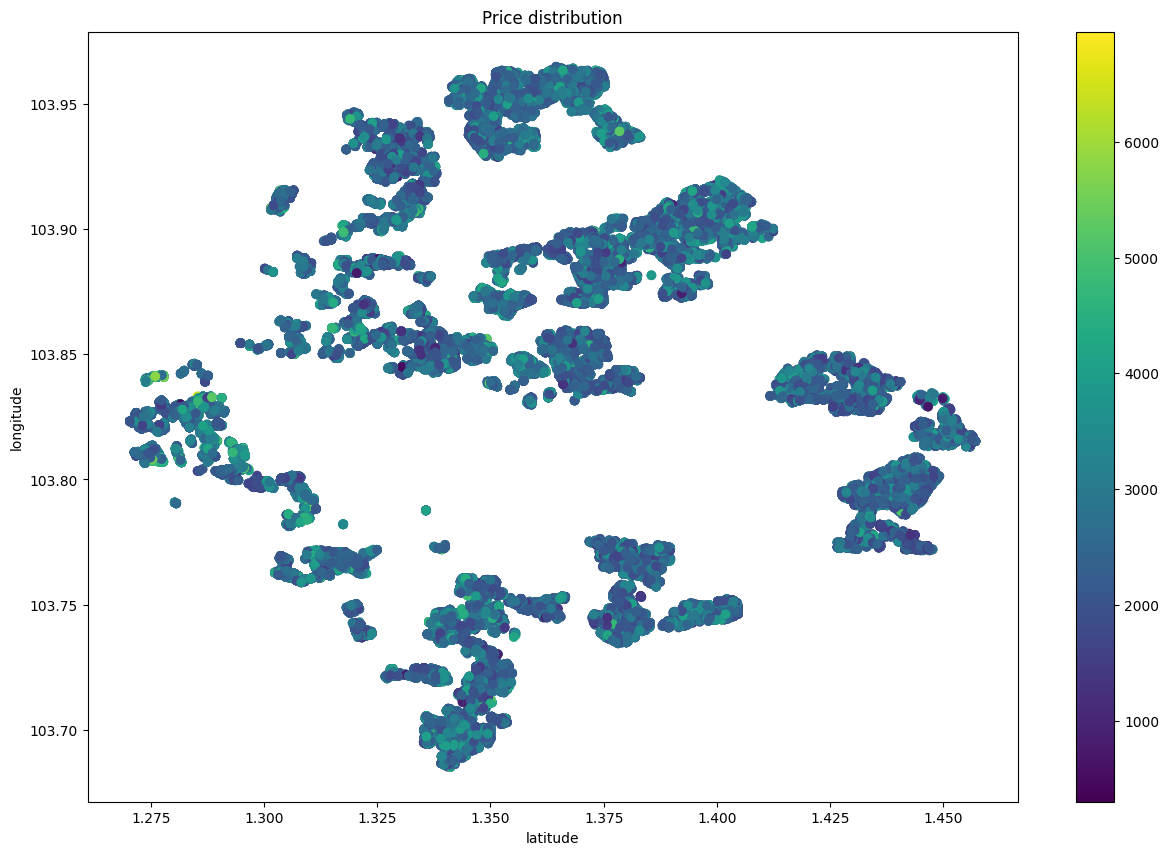

In [6]:
def visual_train_data():
    plt.figure(figsize=(15, 10))
    plt.scatter(train_data_df['latitude'], train_data_df['longitude'], c=train_data_df['monthly_rent'], cmap='viridis')
    plt.colorbar()
    plt.xlabel('latitude')
    plt.ylabel('longitude')
    plt.title('Price distribution')
    plt.savefig('visual_train_data_latlng.png')
    plt.show()

visual_train_data()

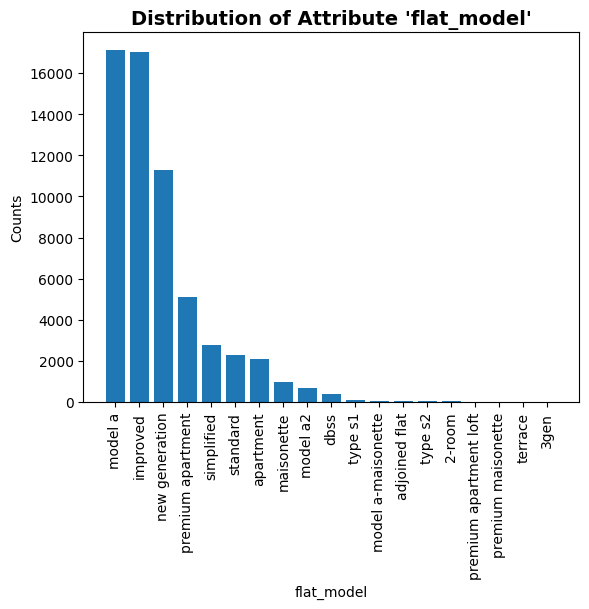

<Figure size 640x480 with 0 Axes>

In [7]:
train_data_df['flat_model'] = train_data_df['flat_model'].str.lower()
counts = train_data_df['flat_model'].value_counts()
counts = counts.reset_index()
counts.columns = ['flat_model', 'counts']
fig, ax = plt.subplots() 
plt.bar(counts.flat_model, counts.counts)
plt.xticks(rotation=90)
ax.set_xlabel('flat_model') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'flat_model\'', fontsize = 14, fontweight ='bold') 
plt.show()
plt.savefig('visual_flat_model.png')

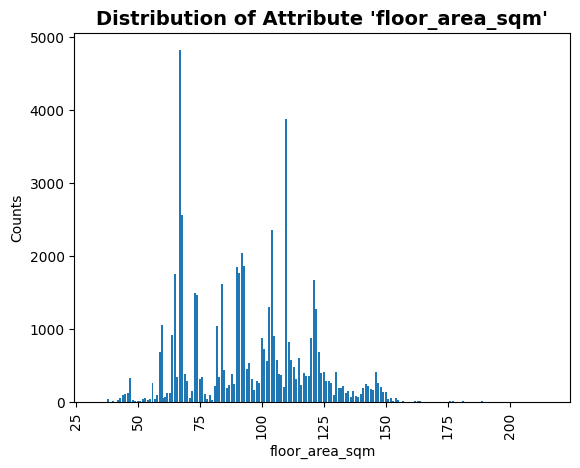

<Figure size 640x480 with 0 Axes>

In [8]:
counts = train_data_df['floor_area_sqm'].value_counts()
counts = counts.reset_index()
counts.columns = ['floor_area_sqm', 'counts']
fig, ax = plt.subplots() 
plt.bar(counts.floor_area_sqm, counts.counts)
plt.xticks(rotation=90)
ax.set_xlabel('floor_area_sqm') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'floor_area_sqm\'', fontsize = 14, fontweight ='bold') 
plt.show()
plt.savefig('visual_train_floor_area_sqm.png')

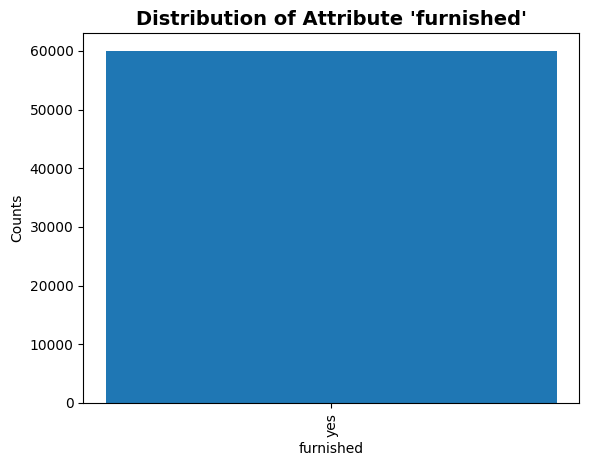

<Figure size 640x480 with 0 Axes>

In [9]:
train_data_df['furnished'] = train_data_df['furnished'].str.lower()
counts = train_data_df['furnished'].value_counts()
counts = counts.reset_index()
counts.columns = ['furnished', 'counts']
fig, ax = plt.subplots() 
plt.bar(counts.furnished, counts.counts)
plt.xticks(rotation=90)
ax.set_xlabel('furnished') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'furnished\'', fontsize = 14, fontweight ='bold') 
plt.show()
plt.savefig('visual_furnished.png')

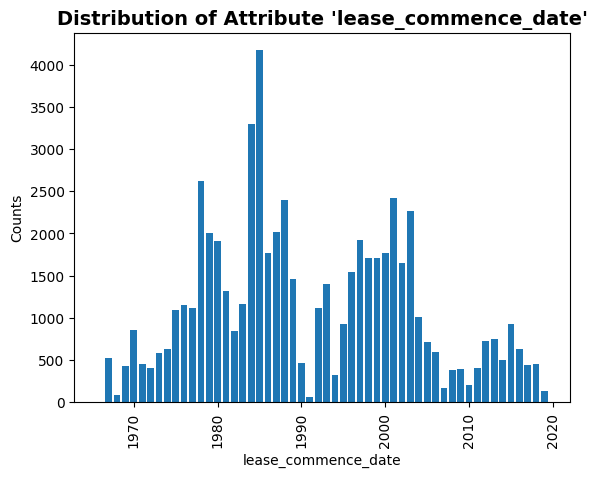

<Figure size 640x480 with 0 Axes>

In [10]:
counts = train_data_df['lease_commence_date'].value_counts()
counts = counts.reset_index()
counts.columns = ['lease_commence_date', 'counts']
fig, ax = plt.subplots() 
plt.bar(counts.lease_commence_date, counts.counts)
plt.xticks(rotation=90)
ax.set_xlabel('lease_commence_date') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'lease_commence_date\'', fontsize = 14, fontweight ='bold') 
plt.show()
plt.savefig('visual_train_lease_commence_date.png')

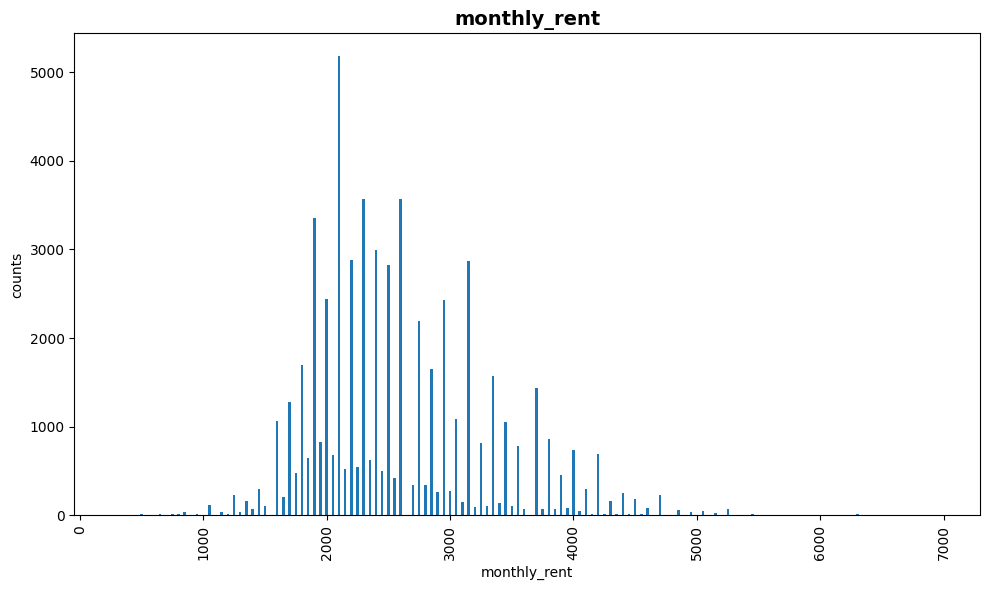

<Figure size 640x480 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

unique_values = train_data_df['monthly_rent'].value_counts().reset_index()
unique_values.columns = ['monthly_rent', 'counts']
fig, ax = plt.subplots(figsize=(10, 6))  # 调整图形大小
plt.bar(unique_values.monthly_rent, unique_values.counts, width=20)  # 调整宽度
ax.set_xlabel('monthly_rent')
ax.set_ylabel('counts')
ax.set_title('monthly_rent', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()
plt.savefig('visual_train_monthly_rent.png')


In [12]:
import pandas as pd
missing_values = train_data_df.isnull().sum()
print(missing_values)


index                  0
rent_approval_date     0
town                   0
block                  0
street_name            0
flat_type              0
flat_model             0
floor_area_sqm         0
furnished              0
lease_commence_date    0
latitude               0
longitude              0
elevation              0
subzone                0
planning_area          0
region                 0
monthly_rent           0
dtype: int64


There are 0 numerical features with skewness > 0.5 :



Series([], dtype: float64)

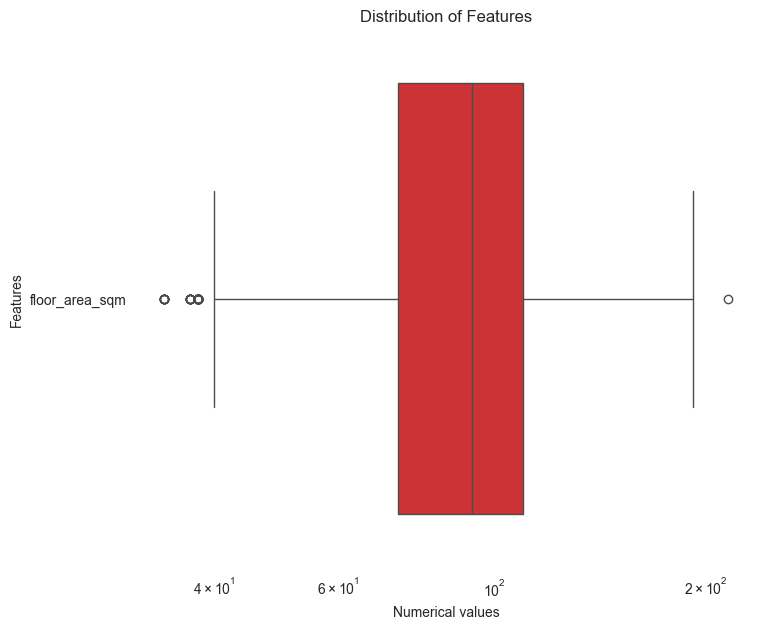

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy import stats

# List all numerical features
numerical_features = ['floor_area_sqm']
# Boxplot to visualize the skewness of the numerical features
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=train_data_df[numerical_features] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Features")
ax.set(xlabel="Numerical values")
ax.set(title="Distribution of Features")
sns.despine(trim=True, left=True)
# Check skewness of all features
skewness = train_data_df[numerical_features].apply(lambda x: skew(x))

high_skewed = skewness[abs(skewness) > 0.5]

print("There are {} numerical features with skewness > 0.5 :\n".format(high_skewed.shape[0]))
high_skewed

In [14]:
duplicates = train_data_df[train_data_df.duplicated()]
print('There are {} duplicate records in the dataset'.format(duplicates.shape[0]))

There are 0 duplicate records in the dataset


In [15]:
train_data_df = train_data_df.drop_duplicates(ignore_index=True)
print('After dropping duplicate data, the training dataset now has {} rows'.format(train_data_df.shape[0]))
train_data_df.head()

After dropping duplicate data, the training dataset now has 60000 rows


index rent_approval_date             town block            street_name  \
0      0            2021-09      jurong east   257  Jurong East Street 24   
1      1            2022-05            bedok   119       bedok north road   
2      2            2022-10        toa payoh   157     lorong 1 toa payoh   
3      3            2021-08        pasir ris   250    Pasir Ris Street 21   
4      4            2022-11  kallang/whampoa    34           Whampoa West   

   flat_type      flat_model  floor_area_sqm furnished  lease_commence_date  \
0     3 room  new generation            67.0       yes                 1983   
1     4-room  new generation            92.0       yes                 1978   
2     3-room        improved            67.0       yes                 1971   
3  executive       apartment           149.0       yes                 1993   
4     3-room        improved            68.0       yes                 1972   

   latitude   longitude  elevation            subzone planning_area  \
0  1.344518  103.738630        0.0         yuhua east   jurong east   
1  1.330186  103.938717        0.0        bedok north         bedok   
2  1.332242  103.845643        0.0  toa payoh central     toa payoh   
3  1.370239  103.962894        0.0    pasir ris drive     pasir ris   
4  1.320502  103.863341        0.0          bendemeer       kallang   

           region  monthly_rent  
0     west region          1600  
1     east region          2250  
2  central region          1900  
3     east region          2850  
4  central region          2100

In [16]:
train_data_df = pd.get_dummies(train_data_df, columns=['furnished'])
train_data_df.head()

index rent_approval_date             town block            street_name  \
0      0            2021-09      jurong east   257  Jurong East Street 24   
1      1            2022-05            bedok   119       bedok north road   
2      2            2022-10        toa payoh   157     lorong 1 toa payoh   
3      3            2021-08        pasir ris   250    Pasir Ris Street 21   
4      4            2022-11  kallang/whampoa    34           Whampoa West   

   flat_type      flat_model  floor_area_sqm  lease_commence_date  latitude  \
0     3 room  new generation            67.0                 1983  1.344518   
1     4-room  new generation            92.0                 1978  1.330186   
2     3-room        improved            67.0                 1971  1.332242   
3  executive       apartment           149.0                 1993  1.370239   
4     3-room        improved            68.0                 1972  1.320502   

    longitude  elevation            subzone planning_area          region  \
0  103.738630        0.0         yuhua east   jurong east     west region   
1  103.938717        0.0        bedok north         bedok     east region   
2  103.845643        0.0  toa payoh central     toa payoh  central region   
3  103.962894        0.0    pasir ris drive     pasir ris     east region   
4  103.863341        0.0          bendemeer       kallang  central region   

   monthly_rent  furnished_yes  
0          1600           True  
1          2250           True  
2          1900           True  
3          2850           True  
4          2100           True

In [17]:
import category_encoders as ce

target_encoder = ce.TargetEncoder()


train_data_df['flat_model_encoded'] = target_encoder.fit_transform(train_data_df['flat_model'], train_data_df['monthly_rent'])

train_data_df.head()


ModuleNotFoundError: No module named 'category_encoders'

In [17]:
target_encoder = ce.TargetEncoder()
test_data_df["flat_model"] = target_encoder.fit_transform(train_data_df['flat_model'], train_data_df['monthly_rent'])

In [18]:
train_data_df['lease_commence_date'].value_counts()

1985    4171
1984    3295
1978    2626
2001    2422
1988    2400
2003    2266
1987    2016
1979    2000
1997    1923
1980    1912
2000    1773
1986    1763
1998    1712
1999    1709
2002    1651
1996    1540
1989    1464
1993    1399
1981    1314
1983    1160
1976    1151
1977    1119
1992    1114
1975    1096
2004    1007
2015     923
1995     922
1970     853
1982     848
2013     748
2012     724
2005     709
2016     630
1974     630
2006     600
1973     578
1967     523
2014     499
1990     470
2018     453
1971     450
2017     443
1969     430
1972     409
2011     401
2009     396
2008     383
1994     317
2010     202
2007     163
2019     137
1968      89
1991      66
1966       1
Name: lease_commence_date, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
train_data_df['lease_commence_date'] = train_data_df['lease_commence_date'].apply(str)
label_encoder = LabelEncoder()
train_data_df['lease_commence_date'] = label_encoder.fit_transform(train_data_df['lease_commence_date'])
train_data_df.head()

index rent_approval_date             town block            street_name  \
0      0            2021-09      jurong east   257  Jurong East Street 24   
1      1            2022-05            bedok   119       bedok north road   
2      2            2022-10        toa payoh   157     lorong 1 toa payoh   
3      3            2021-08        pasir ris   250    Pasir Ris Street 21   
4      4            2022-11  kallang/whampoa    34           Whampoa West   

   flat_type      flat_model  floor_area_sqm  lease_commence_date  latitude  \
0     3 room  new generation            67.0                   17  1.344518   
1     4-room  new generation            92.0                   12  1.330186   
2     3-room        improved            67.0                    5  1.332242   
3  executive       apartment           149.0                   27  1.370239   
4     3-room        improved            68.0                    6  1.320502   

    longitude  elevation            subzone planning_area          region  \
0  103.738630        0.0         yuhua east   jurong east     west region   
1  103.938717        0.0        bedok north         bedok     east region   
2  103.845643        0.0  toa payoh central     toa payoh  central region   
3  103.962894        0.0    pasir ris drive     pasir ris     east region   
4  103.863341        0.0          bendemeer       kallang  central region   

   monthly_rent  furnished_yes  flat_model_encoded  
0          1600              1         2369.965462  
1          2250              1         2369.965462  
2          1900              1         2636.211052  
3          2850              1         2878.725962  
4          2100              1         2636.211052

In [20]:
## !!!!!!! NOTE: 这里出现未知年份，这列暂时不encode了！！！！！
test_data_df['lease_commence_date'] = label_encoder.transform(test_data_df['lease_commence_date'])

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
train_data_df.dtypes
train_data_df.head()

In [ ]:
test_data_df.head()

In [ ]:
train_data_df.to_csv('processed_data.csv', index=False)

In [ ]:
train_data_df[['index', 'flat_model', 'floor_area_sqm', 'lease_commence_date']].to_csv("./preprocessed/train_2.csv", index=False)
# train_data_df[['flat_model', 'floor_area_sqm', 'lease_commence_date']].to_csv("./preprocessed/test_2.csv")

In [ ]:
test_data_df[['index', 'flat_model', 'floor_area_sqm', 'lease_commence_date']].to_csv("./preprocessed/test_2.csv", index=False)

In [20]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

# 加载辅助数据集：地铁站的坐标数据
mrt_stations_df = pd.read_csv('Datasets/auxiliary-data/sg-mrt-existing-stations.csv') 
train_data_df['nearest_mrt_distance'] = pd.Series()
# 使用euclidean_distances计算房屋到地铁站的距离矩阵
train_data_df['nearest_mrt_distance']= euclidean_distances(train_data_df[['latitude', 'longitude']], mrt_stations_df[['latitude', 'longitude']]).min(axis=1)

train_data_df.head()


index rent_approval_date             town block            street_name  \
0      0            2021-09      jurong east   257  Jurong East Street 24   
1      1            2022-05            bedok   119       bedok north road   
2      2            2022-10        toa payoh   157     lorong 1 toa payoh   
3      3            2021-08        pasir ris   250    Pasir Ris Street 21   
4      4            2022-11  kallang/whampoa    34           Whampoa West   

   flat_type      flat_model  floor_area_sqm furnished  lease_commence_date  \
0     3 room  new generation            67.0       yes                 1983   
1     4-room  new generation            92.0       yes                 1978   
2     3-room        improved            67.0       yes                 1971   
3  executive       apartment           149.0       yes                 1993   
4     3-room        improved            68.0       yes                 1972   

   latitude   longitude  elevation            subzone planning_area  \
0  1.344518  103.738630        0.0         yuhua east   jurong east   
1  1.330186  103.938717        0.0        bedok north         bedok   
2  1.332242  103.845643        0.0  toa payoh central     toa payoh   
3  1.370239  103.962894        0.0    pasir ris drive     pasir ris   
4  1.320502  103.863341        0.0          bendemeer       kallang   

           region  monthly_rent  nearest_mrt_distance  
0     west region          1600              0.006289  
1     east region          2250              0.008087  
2  central region          1900              0.001966  
3     east region          2850              0.013908  
4  central region          2100              0.001690

In [21]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

# 加载辅助数据集：地铁站的坐标数据
mrt_stations_df = pd.read_csv('Datasets/auxiliary-data/sg-mrt-existing-stations.csv') 
test_data_df['nearest_mrt_distance'] = pd.Series()
# 使用euclidean_distances计算房屋到地铁站的距离矩阵
test_data_df['nearest_mrt_distance']= euclidean_distances(test_data_df[['latitude', 'longitude']], mrt_stations_df[['latitude', 'longitude']]).min(axis=1)

test_data_df.head()

index rent_approval_date         town block             street_name  \
0      0            2023-01      hougang   245       hougang street 22   
1      1            2022-09    sembawang   316         sembawang vista   
2      2            2023-07     clementi   708  Clementi West Street 2   
3      3            2021-08  jurong east   351   Jurong East Street 31   
4      4            2022-03  jurong east   305   jurong east street 32   

  flat_type      flat_model  floor_area_sqm furnished  lease_commence_date  \
0    5-room        improved           121.0       yes                 1984   
1    4-room         model a           100.0       yes                 1999   
2    4-room  new generation            91.0       yes                 1980   
3    3 room         model a            74.0       yes                 1986   
4    5-room        improved           121.0       yes                 1983   

   latitude   longitude  elevation            subzone planning_area  \
0  1.358411  103.891722        0.0      lorong ah soo       hougang   
1  1.446343  103.820817        0.0  sembawang central     sembawang   
2  1.305719  103.762168        0.0      clementi west      clementi   
3  1.344832  103.730778        0.0         yuhua west   jurong east   
4  1.345437  103.735241        0.0         yuhua west   jurong east   

              region  nearest_mrt_distance  
0  north-east region              0.007379  
1       north region              0.002768  
2        west region              0.009872  
3        west region              0.003263  
4        west region              0.004038

In [23]:
import numpy as np

#验证计算没错
distance = np.sqrt((1.358411187 - 1.35990191952976)**2 + (103.891722 - 103.884494725197)**2)
print(distance)

0.007379416274568503


In [48]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

# 加载 'sg-mrt-planned-stations' 辅助数据集
planned_mrt_stations_df = pd.read_csv('Datasets/auxiliary-data/sg-mrt-planned-stations.csv')
planned_mrt_stations_df = planned_mrt_stations_df[~(planned_mrt_stations_df['opening_year'] == 'TBA')]

# 创建一个空的DataFrame来存储每个房屋到规划中地铁站的距离和开放年份
distance_and_opening_df = pd.DataFrame()

# 使用euclidean_distances计算房屋到规划中地铁站的距离矩阵
distances_matrix = euclidean_distances(train_data_df[['latitude', 'longitude']], planned_mrt_stations_df[['latitude', 'longitude']])

# 找到每个房屋到规划中地铁站的最小距离
min_distances = distances_matrix.min(axis=1)

# 创建一个列表来存储对应于最小距离的开放年份
opening_years = []

for index, distance in enumerate(min_distances):
    if np.isnan(distance):
        # 如果没有对应地铁站，使用NaN表示
        opening_years.append(np.nan)
    else:
        # 根据最小距离找到对应的开放年份
        nearest_station_index = np.argmin(distances_matrix[index])
        opening_years.append(planned_mrt_stations_df.iloc[nearest_station_index]['opening_year'])

# 将最小距离和开放年份添加到DataFrame
distance_and_opening_df['planned_mrt_distance'] = min_distances * 1000
distance_and_opening_df['planned_mrt_opening_year'] = opening_years
distance_and_opening_df['planned_mrt_opening_year'] = distance_and_opening_df['planned_mrt_opening_year'].astype(int)

# 将新的列添加到train_data_df
train_data_df = pd.concat([train_data_df, distance_and_opening_df], axis=1)

train_data_df.head()




index rent_approval_date             town block            street_name  \
0      0            2021-09      jurong east   257  Jurong East Street 24   
1      1            2022-05            bedok   119       bedok north road   
2      2            2022-10        toa payoh   157     lorong 1 toa payoh   
3      3            2021-08        pasir ris   250    Pasir Ris Street 21   
4      4            2022-11  kallang/whampoa    34           Whampoa West   

   flat_type      flat_model  floor_area_sqm furnished  lease_commence_date  \
0     3 room  new generation            67.0       yes                 1983   
1     4-room  new generation            92.0       yes                 1978   
2     3-room        improved            67.0       yes                 1971   
3  executive       apartment           149.0       yes                 1993   
4     3-room        improved            68.0       yes                 1972   

   latitude   longitude  elevation            subzone planning_area  \
0  1.344518  103.738630        0.0         yuhua east   jurong east   
1  1.330186  103.938717        0.0        bedok north         bedok   
2  1.332242  103.845643        0.0  toa payoh central     toa payoh   
3  1.370239  103.962894        0.0    pasir ris drive     pasir ris   
4  1.320502  103.863341        0.0          bendemeer       kallang   

           region  monthly_rent  planned_mrt_distance  \
0     west region          1600              6.071113   
1     east region          2250              8.134882   
2  central region          1900             33.423443   
3     east region          2850              4.642574   
4  central region          2100             25.344877   

   planned_mrt_opening_year  
0                      2028  
1                      2040  
2                      2030  
3                      2030  
4                      2024

opening_year
2030    15
2027    11
2032     9
2024     8
2028     7
2029     7
TBA      5
2025     5
2040     4
2026     3
Name: count, dtype: int64

In [25]:
import numpy as np

#验证计算没错
distance = np.sqrt((1.34451804267549 - 1.33984)**2 + (103.738630332612 - 103.7425)**2)
print(distance)

0.006071112663052462


In [49]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

# 加载 'sg-mrt-planned-stations' 辅助数据集
planned_mrt_stations_df = pd.read_csv('Datasets/auxiliary-data/sg-mrt-planned-stations.csv')
planned_mrt_stations_df = planned_mrt_stations_df[~(planned_mrt_stations_df['opening_year'] == 'TBA')]

# 创建一个空的DataFrame来存储每个房屋到规划中地铁站的距离和开放年份
distance_and_opening_df = pd.DataFrame()

# 使用euclidean_distances计算房屋到规划中地铁站的距离矩阵
distances_matrix = euclidean_distances(test_data_df[['latitude', 'longitude']], planned_mrt_stations_df[['latitude', 'longitude']])

# 找到每个房屋到规划中地铁站的最小距离
min_distances = distances_matrix.min(axis=1)

# 创建一个列表来存储对应于最小距离的开放年份
opening_years = []

for index, distance in enumerate(min_distances):
    if np.isnan(distance):
        # 如果没有对应地铁站，使用NaN表示
        opening_years.append(np.nan)
    else:
        # 根据最小距离找到对应的开放年份
        nearest_station_index = np.argmin(distances_matrix[index])
        opening_years.append(planned_mrt_stations_df.iloc[nearest_station_index]['opening_year'])

# 将最小距离和开放年份添加到DataFrame
distance_and_opening_df['planned_mrt_distance'] = min_distances * 1000
distance_and_opening_df['planned_mrt_opening_year'] = opening_years
distance_and_opening_df['planned_mrt_opening_year'] = distance_and_opening_df['planned_mrt_opening_year'].astype(int)

# 将新的列添加到train_data_df
test_data_df = pd.concat([test_data_df, distance_and_opening_df], axis=1)

test_data_df.head()

index rent_approval_date         town block             street_name  \
0      0            2023-01      hougang   245       hougang street 22   
1      1            2022-09    sembawang   316         sembawang vista   
2      2            2023-07     clementi   708  Clementi West Street 2   
3      3            2021-08  jurong east   351   Jurong East Street 31   
4      4            2022-03  jurong east   305   jurong east street 32   

  flat_type      flat_model  floor_area_sqm furnished  lease_commence_date  \
0    5-room        improved           121.0       yes                 1984   
1    4-room         model a           100.0       yes                 1999   
2    4-room  new generation            91.0       yes                 1980   
3    3 room         model a            74.0       yes                 1986   
4    5-room        improved           121.0       yes                 1983   

   latitude   longitude  elevation            subzone planning_area  \
0  1.358411  103.891722        0.0      lorong ah soo       hougang   
1  1.446343  103.820817        0.0  sembawang central     sembawang   
2  1.305719  103.762168        0.0      clementi west      clementi   
3  1.344832  103.730778        0.0         yuhua west   jurong east   
4  1.345437  103.735241        0.0         yuhua west   jurong east   

              region  planned_mrt_distance  planned_mrt_opening_year  
0  north-east region              8.113803                      2030  
1       north region             79.235196                      2030  
2        west region              6.674687                      2032  
3        west region              9.625802                      2028  
4        west region              7.084933                      2028

In [50]:
train_data_df[['index', 'planned_mrt_distance', 'planned_mrt_opening_year']].to_csv("./preprocessed/train_5.csv", index=False)
test_data_df[['index', 'planned_mrt_distance', 'planned_mrt_opening_year']].to_csv("./preprocessed/test_5.csv", index=False)